Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 2
## april 2021. 

Ana Zoric 0009/2020

<font color='red'>
Preimenovati svesku u "domaci_zadatak_2_ime_prezime"<br></font>

# __Zadatak__: Van der Pol oscilator
Van der Pol-ova jednačina predstavlja nelinearnu diferencijalnu jednačinu drugog reda sličnu jednačini prigušenih oscilacija i ima formu:

\begin{equation}
    \frac{d^2x}{dt^2} + \mu(x^2 - 1)\frac{dx}{dt} + x = 0
\end{equation}

gde je $\mu$ parametar koji modeluje prigušenje (ujedno i "jačinu nelinearnosti" jednačine) i za koji važi da je $\mu \geq 0$. Istorijski jednačina opisuje napon u jednom nelinearnom električnom kolu koje je služilo kao oscilator u prvim radio aparatima. Osim domena elektronike, jednačina ima svoje primene i u laserskoj tehnici (laser je tip van der Pol-ovog oscilatora), biologiji (opisivanje električnog potencijala neurona), seizmologiji (prostiji modeli zemljotresa) itd.  

a) Formirati Python definiciju <font color='blue'>vanderpol</font> koja predstavlja datu diferencijalnu jednačinu i za pozivni parametar ima parametar $\mu$. Rešiti jednačinu na vremenskom domenu od $0$ do $30$ u $1000$ ekvidistantnih tačaka, za početne uslove $x(0) = 0.5$ i $dx/dt = 0$ i za četiri vrednosti parametra $\mu$, $\mu = 0.1, 2, 5, 10$. Prikazati zavisnosti $x(t)$ u okviru jednog $2\times 2$ subplot-a. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$. Na drugom $2\times 2$ subplot-u nacrtati fazne dijagrame $dx/dt$ u funkciji od $x$. Obeležiti ose svake ćelije grafika i nasloviti svaku ćeliju grafika. U naslovu je potrebno da stoji odgovarajuća vrednost parametra $\mu$.  

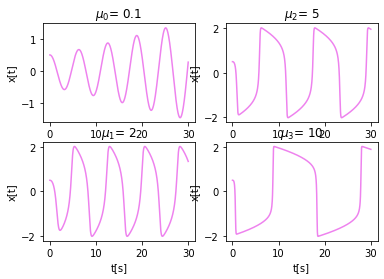

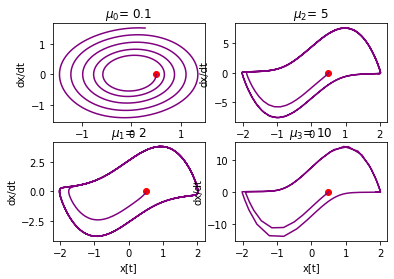

In [19]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import math

def vanderpol(y,t,mi):
    y1,y2=y
    return [y2,mi*(1-y1*y1)*y2-y1]

t=np.linspace(0,30,1000)
x0=0.5
dxdt=0
miniz=[0.1,2,5,10]
_,axis=plt.subplots(2,2)
for i,mi in enumerate(miniz):
    plot = axis[i % 2, int(i / 2)]
    rez=odeint(vanderpol,(x0,dxdt),t,(mi,))
    plot.plot(t, np.transpose(rez)[0],color="violet")
    plot.set_ylabel("x[t]")
    plot.set_xlabel("t[s]")
    plot.set_title('$\\mu_' + str(i) + '$'+"= " +str(mi))
    #plot.legend()


_,axis=plt.subplots(2,2)
for i,mi in enumerate(miniz):
    plot=axis[i%2,int(i/2)]
    x,dx=np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))
    plot.plot(x,dx,color="purple")
    plot.set_xlabel("x[t]")
    plot.set_ylabel("dx/dt")
    plot.set_title('$\\mu_' + str(i) + '$'+"= " +str(mi))
    plot.scatter(x0,0,color="red")
    
    
plt.show()

Komentarisati kako parametar $\mu$ utiče na dobijenu dinamiku. Kakve su oscilacije u slučaju malog "prigušenja", a kakve u slučaju velikog? Komentarisati oblike faznih dijagrama u zavisnosti od parametra $\mu$. U skladu sa datim početnim uslovima, za svaki od slučaja prepoznati početnu tačku faznog dijagrama i obeležiti je na grafiku markerom crvene boje. Komentarisati u kom smeru se iscrtava fazni dijagram. 

<font color='red'>Uneti komentar/odgovor na pitanje.</font>
U slucaju malog prigusenja, oscilacije imaju kraci period u odnosu na one u slucaju velikog prigusenja, dakle parametar mi utice na dobijenu donamiku tako sto sto je njegova vrednost veca, period oscilacija je kraci.
mi=0.1: oscilacije su vrlo slabo prigusene i fazni dijagram zbog toga ima oblik spirale, ne ulazi u stacionarno stanje
za sve ostale vrednosti mi vazi da su oscilacije jako prigusene i brzo se ulazi u stacionarno stanje.

b) Napisati Python definiciju <font color='blue'>maksimumi</font> koja pronalazi sve lokalne maksimume zavisnosti $x(t)$, odnosno vraća vrednosti maksimuma i vremenske trenutke u kojima se maksimumi dostižu. Primeniti funkciju na sva četiri rešenja iz prethodne tačke. Korišćenjem naredbe <font color='blue'>numpy.diff</font> kao i naredbe za srednju vrednost niza brojeva, za svaku vrednost parametra $\mu$ odrediti i ispisati period oscilacija kao srednju vrednost rastojanja između susedih maksimuma.  

In [2]:
def maksimumi(niz,vreme):
    rez = [niz[i] for i in range(1, len(niz)-1) if niz[i-1] < niz[i] > niz[i+1]]
    rezt=[vreme[i] for i in range(1, len(niz)-1) if niz[i-1] < niz[i] > niz[i+1]]
    return [rez,rezt]

for i,mi in enumerate(miniz):
    x,tx=maksimumi(np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))[0],t)
    mx=np.diff(tx)
    print("Period oscilovanja za mi={} je:   ".format(mi),np.average(mx))

plt.show()

Period oscilovanja za mi=0.1 je:    6.276276276276275
Period oscilovanja za mi=2 je:    7.6376376376376385
Period oscilovanja za mi=5 je:    11.606606606606608
Period oscilovanja za mi=10 je:    19.0990990990991


<font color='red'>Uneti komentar/odgovor na pitanje.</font>

c) Varirati parametar $\mu$ od $0.1$ do $15$ u $20$ tačaka i u svakoj tački izračunati period oscilacija. Nacrtati grafik zavisnosti perioda oscilacija $T$ od parametra $\mu$. Obeležiti ose grafika. Koristeći <font color='blue'>scipy.optimize.curve_fit</font> odrediti koeficijente koji definišu optimalnu pravu.  

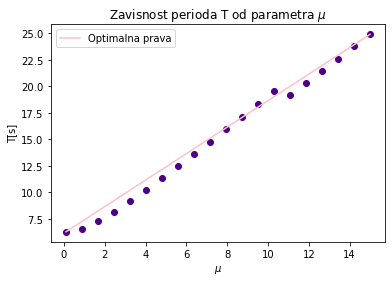

In [3]:
miniz=np.linspace(0.1,15,20)
periodi=list()

def funkcija(miniz,periodi,t):
    periodi=[0]*len(miniz)
    for i,mi in enumerate(miniz):
        x,tx=maksimumi(np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))[0],t)
        if len(tx)!=1: periodi[i]=np.average(np.diff(tx))
        if len(tx)==1: periodi[i]=np.average(np.diff(minimumi(np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))[0],t))[1])
    return periodi

def minimumi(niz,vreme):
    rez = [niz[i] for i in range(1, len(niz)-1) if niz[i-1] > niz[i] < niz[i+1]]
    rezt=[vreme[i] for i in range(1, len(niz)-1) if niz[i-1] > niz[i] < niz[i+1]]
    return [rez,rezt]

def fja(mi,periodi,t):
    x,tx=maksimumi(np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))[0],t)
    print(tx)
    if len(tx)!=1: T=np.average(np.diff(tx))
    if len(tx)==1: 
        x,tx=minimumi(np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))[0],t)
        T=np.average(np.diff(tx))
    return T

def f(mi,period):
    return period

periodi=funkcija(miniz,periodi,t)
plt.scatter(miniz,periodi,color="indigo")
plt.ylabel("T[s]")
plt.xlabel("$\\mu$")
plt.title("Zavisnost perioda T od parametra $\\mu$")

popt,pcov=curve_fit(f,miniz,periodi)
T=popt
x=np.linspace(min(miniz),max(miniz),2)
y=funkcija(x,T,t)
plt.plot(x, y, label='Optimalna prava', color='pink')
#x,y=scipy.optimize.curve_fit(fja,miniz,periodi)
#y,z=scipy.optimize.curve_fit(fja,miniz,periodi)
#print(y)
#plt.plot(funkcija,y,z,color="red")
plt.legend()
plt.show()

d) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafike iz tačke a) primenom ove metode. Na jednom $2\times 2$ subplot grafiku nacrtati rešenja $x(t)$ iz tačke a) kao i rešenja za $x(t)$ dobijena primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. Na drugom $2\times 2$ subplot grafiku nacrtati fazne dijagrame $dx/dt$ u funkciji $x$ iz tačke a) kao i fazne dijagrame dobijene primenom FDM metode. Obeležiti ose svake ćelije grafika, uneti naslov svake ćelije, kao i legendu. 

Pažljivo odabrati vremenski korak rešavanja i diskutovati izbor. Da li izbor vremenskog koraka zavisi od parametra $\mu$ i ako zavisi komentarisati zašto. 

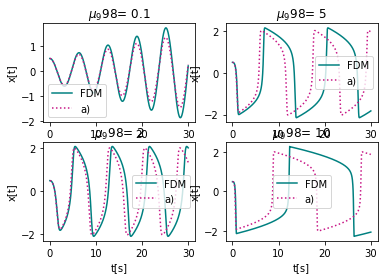

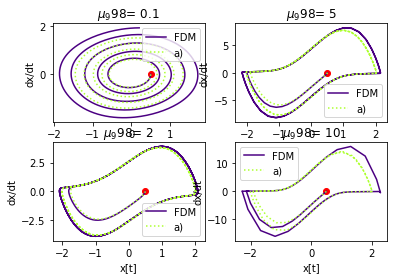

In [31]:
t=np.linspace(0,30,1000)
x0=0.5
dxdt=0
dt=30/1000
miniz=[0.1,2,5,10]
_,axis=plt.subplots(2,2)
for i,mi in enumerate(miniz):
    plot = axis[i % 2, int(i / 2)]
    
    rez1=[[],[]]
    rez1[0]=[0]*1000
    rez1[1]=[0]*1000
    rez1[0][0]=x0
    rez1[1][0]=dxdt
    dxdt1,dxdt2=x0,dxdt
    for i in range(999):
        dxdt1,dxdt2=vanderpol([rez1[0][i],rez1[1][i]],t[i+1],mi)
        rez1[0][i+1]=rez1[0][i]+dt*dxdt1
        rez1[1][i+1]=rez1[1][i]+dt*dxdt2
    plot.plot(t, rez1[0],color="teal",label="FDM")
    
    rez=odeint(vanderpol,(x0,dxdt),t,(mi,))
    plot.plot(t, np.transpose(rez)[0],color="mediumVioletRed",linestyle="dotted",label="a)")
    
    plot.set_ylabel("x[t]")
    plot.set_xlabel("t[s]")
    plot.set_title('$\\mu_' + str(i) + '$'+"= " +str(mi))
    plot.legend()


_,axis=plt.subplots(2,2)
for i,mi in enumerate(miniz):
    plot=axis[i%2,int(i/2)]
    
    rez2=[[],[]]
    rez2[0]=[0]*1000
    rez2[1]=[0]*1000
    rez2[0][0]=x0
    rez2[1][0]=dxdt
    dxdt1,dxdt2=x0,dxdt
    for i in range(999):
        dxdt1,dxdt2=vanderpol([rez2[0][i],rez2[1][i]],t[i+1],mi)
        rez2[0][i+1]=rez2[0][i]+dt*dxdt1
        rez2[1][i+1]=rez2[1][i]+dt*dxdt2
    plot.plot(rez2[0],rez2[1],color="indigo",label="FDM")
    
    x,dx=np.transpose(odeint(vanderpol,(x0,dxdt),t,(mi,)))
    plot.plot(x,dx,color="greenYellow",linestyle="dotted",label="a)")
    plot.set_xlabel("x[t]")
    plot.set_ylabel("dx/dt")
    plot.set_title('$\\mu_' + str(i) + '$'+"= " +str(mi))
    plot.scatter(x0,0,color="red")
    plot.legend()
    
plt.show()

<font color='red'>Uneti komentar/odgovor na pitanje.</font>
Vremenski korak moze zavisiti od parametra mi, u smislu da ako je mi manje trebace nam kraci korak kako bi grafik bio sto precizniji, posto je period oscilacija kraci i grafik onda ima vise minimuma i maksimuma, tj 'brze se krece gore dole'. Izabrala sam vremenski korak isti kao u tacki pod a, da bi grafik iz tacke pod a mogao da stane na istu skalu kao i ovaj.